In [1]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities.
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 5.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15275, done.
remote: Total 15275 (delta 0), reused 0 (delta 0), pack-reused 15275
Receiving objects: 100% (15275/15275), 6.17 MiB | 8.98 MiB/s, done.
Resolving deltas: 100% (11111/11111), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9

In [2]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.1 ; cuda:  cu118
detectron2: 0.6


In [3]:
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2 import model_zoo

import cv2
import numpy
import matplotlib.pyplot as plt
from pprint import pprint

from google.colab.patches import cv2_imshow

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:

import skimage.io as io
import numpy as np
from skimage import transform
stack_path = '/content/gdrive/MyDrive/sandstone_data_for_ML/full_labels_for_deep_learning/128_patches/images_as_128x128_patches.tif'
train_images = io.imread(stack_path)

resized_train_images = []
for image in train_images[:100]:
    rgb_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    resized_train_images.append(rgb_image)

train_images = np.array(resized_train_images)

print("Shape of the TIFF stack:", train_images.shape)

Shape of the TIFF stack: (100, 128, 128, 3)


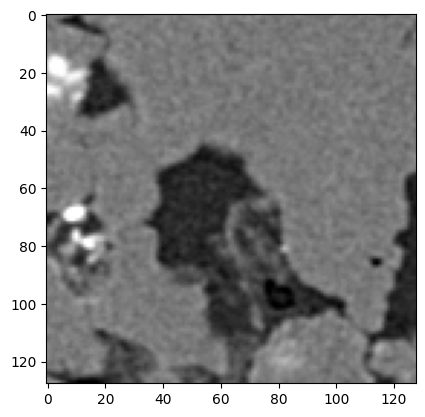

In [7]:
plt.imshow(train_images[0])

In [8]:
stack_path = '/content/gdrive/MyDrive/sandstone_data_for_ML/full_labels_for_deep_learning/128_patches/masks_as_128x128_patches.tif'
train_masks = io.imread(stack_path)

resized_train_masks = []
for image in train_masks[:100]:
    resized_train_masks.append(image)
train_masks = np.array(resized_train_masks)

print("Shape of the TIFF stack:", train_masks.shape)

Shape of the TIFF stack: (100, 128, 128)


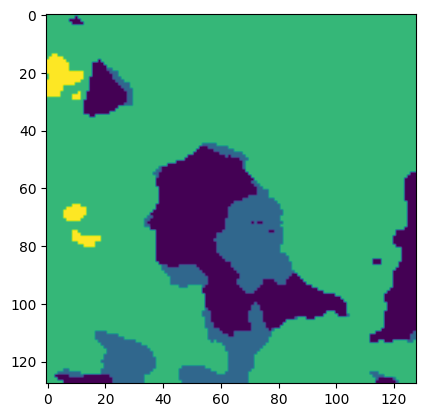

In [9]:
plt.imshow(train_masks[0])

In [10]:
cfg = get_cfg()
cfg.MODEL.DEVICE = "cpu"

cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")

panoptic segmentations


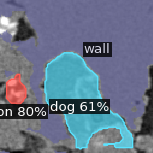

In [14]:
image = train_images[0]
predictor = DefaultPredictor(cfg)
panoptic_seg, segments_info = predictor(image)["panoptic_seg"]

v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
print('panoptic segmentations')
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
out.get_image()[:, :, 2] = 0
cv2_imshow(out.get_image()[:, :, ::-1])

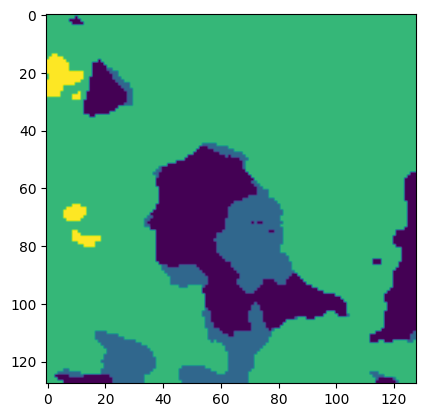

In [16]:
plt.imshow(train_masks[0])